In [135]:
# importing the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statistics as st

df = pd.read_csv("dataset.csv")
# print(df)

In [102]:
# dropping these values as they have too many NaNs and zeros, not much to infer from them.
df = df.drop(['Evaporation','Sunshine','RISK_MM','Cloud3pm','Cloud9am'],axis=1)

In [103]:
# Available locations
print(df.Location.unique())

['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'Newcastle'
 'NorahHead' 'NorfolkIsland' 'Penrith' 'Richmond' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Wollongong' 'Canberra' 'Tuggeranong'
 'MountGinini' 'Ballarat' 'Bendigo' 'Sale' 'MelbourneAirport' 'Melbourne'
 'Mildura' 'Nhil' 'Portland' 'Watsonia' 'Dartmoor' 'Brisbane' 'Cairns'
 'GoldCoast' 'Townsville' 'Adelaide' 'MountGambier' 'Nuriootpa' 'Woomera'
 'Albany' 'Witchcliffe' 'PearceRAAF' 'PerthAirport' 'Perth' 'SalmonGums'
 'Walpole' 'Hobart' 'Launceston' 'AliceSprings' 'Darwin' 'Katherine'
 'Uluru']


In [104]:
# Will be using only these location for our analysis
locs = ['Sydney','Melbourne','Brisbane','Perth','Adelaide','Canberra','Hobart','Darwin','GoldCoast','Newcastle','Townsville']

ds = df.loc[(df.Location == 'Sydney') | (df.Location == 'Melbourne') | (df.Location == 'Brisbane')
            |(df.Location == 'Perth') |(df.Location == 'Adelaide') |(df.Location == 'Canberra')
            |(df.Location == 'Hobart')|(df.Location == 'Darwin')|(df.Location == 'GoldCoast')
            |(df.Location == 'NewCastle')|(df.Location == 'Townsville')]

In [105]:
# Data distribution in chosen location over the years 2007 - 2018
years = ['2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018']
months = ['Jan','Feb','March','Apr','May','June','July','Aug','Sept','Oct','Nov','Dec','total']
count = pd.DataFrame([],index=years,columns=months)
m = 0
for i in locs:
    print('\n\n',i,'\n')
    data = df.loc[df.Location == i]
    for i in range(7,10):
        count.loc['200'+str(i),'total'] = (data.loc[(data.Date>= '200'+str(i)+'-00-00') & 
                                                      (data.Date<= '200'+str(i)+'-13-32')]).shape[0]
        for j in range(1,13):
            if(j//10):   
                count.loc['200'+str(i),months[j-1]] = (data.loc[(data.Date>= '200'+str(i)+'-'+str(j)+'-00') &
                                                              (data.Date<= '200'+str(i)+'-'+str(j)+'-32')]).shape[0]
            else:
                count.loc['200'+str(i),months[j-1]] = (data.loc[(data.Date>= '200'+str(i)+'-0'+str(j)+'-00') &
                                                              (data.Date<= '200'+str(i)+'-0'+str(j)+'-32')]).shape[0]

    for i in range(0,9):
        count.loc['201'+str(i),'total'] = (data.loc[(data.Date>= '201'+str(i)+'-00-00') & 
                                                      (data.Date<= '201'+str(i)+'-13-32')]).shape[0]
        for j in range(1,13):
            if(j//10):   
                count.loc['201'+str(i),months[j-1]] = (data.loc[(data.Date>= '201'+str(i)+'-'+str(j)+'-00') &
                                                              (data.Date<= '201'+str(i)+'-'+str(j)+'-32')]).shape[0]
            else:
                count.loc['201'+str(i),months[j-1]] = (data.loc[(data.Date>= '201'+str(i)+'-0'+str(j)+'-00') &
                                                              (data.Date<= '201'+str(i)+'-0'+str(j)+'-32')]).shape[0]
    print(count)
    



 Sydney 

      Jan  Feb  March  Apr  May  June  July  Aug  Sept  Oct  Nov  Dec  total
2007    0    0      0    0    0     0     0    0     0    0    0    0      0
2008    0   29     31   30   31    30    31   31    30   31   30   31    335
2009   31   28     31   30   31    30    31   31    30   31   30   31    365
2010   31   28     31   30   31    29    31   31    30   30   29   31    362
2011   31   28     31    0   31    30    31   31    30   31   30   31    335
2012   31   29     31   30   31    30    31   31    30   31   30    0    335
2013   31    0     31   30   31    30    31   31    30   31   30   31    337
2014   31   28     31   30   31    30    31   31    29   30   28   31    361
2015   31   28     31   30   31    30    31   31    30   31   30   31    365
2016   31   29     31   30   31    30    31   31    30   31   30   31    366
2017   31   28     31   30   31    25     0    0     0    0    0    0    176
2018    0    0      0    0    0     0     0    0     0    0    0

      Jan  Feb  March  Apr  May  June  July  Aug  Sept  Oct  Nov  Dec  total
2007    0    0      0    0    0     0     0    0     0    0    0    0      0
2008    0    0      0    0    0     0     0    0     0    0    0   31     31
2009   31   28     31   30   31    30    31   31    30   31   30   31    365
2010   31   28     31   30   31    30    31   31    30   25   30   31    359
2011   31   28     26    0   31    30    31   31    25   31   30   31    325
2012   31   29     20   30   31    30    26   31    30   31   29    0    318
2013   31    0     31   25   24    30    31   31    30   31   30   31    325
2014   31   28     28   26   31    30    31   31    30   31   30   30    357
2015   31   28     27   28   31    30    31   31    29   29   29   31    355
2016   31   21     31   30   31    30    31   31    30   30   30   28    354
2017   31   28     30   22   31    24     0    0     0    0    0    0    166
2018    0    0      0    0    0     0     0    0     0    0    0    0      0

In [106]:
# collecting dataset of each location
sydney = ds.loc[ds.Location == 'Sydney']
melbourne = ds.loc[ds.Location == 'Melbourne']
brisbane = ds.loc[ds.Location == 'Brisbane']
perth = ds.loc[ds.Location == 'Perth']
adelaide = ds.loc[ds.Location == 'Adelaide']
canberra = ds.loc[ds.Location == 'Canberra']
# print(sydney)

In [107]:
# collecting data for each location over the years 2008 - 2017
sydney = sydney.loc[(sydney.Date>= '2008-00-00') & (sydney.Date<= '2017-13-32')]
melbourne = melbourne.loc[(melbourne.Date>= '2008-00-00') & (melbourne.Date<= '2017-13-32')]
brisbane = brisbane.loc[(brisbane.Date>= '2008-00-00') & (brisbane.Date<= '2017-13-32')]
perth = perth.loc[(perth.Date>= '2008-00-00') & (perth.Date<= '2017-13-32')]
adelaide = adelaide.loc[(adelaide.Date>= '2008-00-00') & (adelaide.Date<= '2017-13-32')]
canberra = canberra.loc[(canberra.Date>= '2008-00-00') & (canberra.Date<= '2017-13-32')]

In [108]:
nums = ['MinTemp','MaxTemp','Rainfall','WindGustSpeed','WindSpeed9am','WindSpeed3pm',
        'Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Temp9am','Temp3pm']
categs = ['WindGustDir','WindDir9am','WindDir3pm','RainToday','RainTomorrow']

canberra.isna().sum()

Date               0
Location           0
MinTemp            5
MaxTemp            3
Rainfall          16
WindGustDir      329
WindGustSpeed    327
WindDir9am       536
WindDir3pm       228
WindSpeed9am     228
WindSpeed3pm     223
Humidity9am       61
Humidity3pm       12
Pressure9am      224
Pressure3pm      220
Temp9am           17
Temp3pm            7
RainToday         16
RainTomorrow       0
dtype: int64

In [124]:
# cleaning data

# replacing numerical NaN values with the mean values.
for i in nums:
    sydney[i] = sydney[i].astype(float).interpolate()
    melbourne[i] = melbourne[i].astype(float).interpolate()
    brisbane[i] = brisbane[i].astype(float).interpolate()
    perth[i] = perth[i].astype(float).interpolate()
    adelaide[i] = adelaide[i].astype(float).interpolate()
    canberra[i] = canberra[i].astype(float).interpolate()
    
# replcaing categorical NaN values with the previous values.
sydney = sydney.fillna(method='ffill')
sydney = sydney.fillna(method='ffill')
melbourne = melbourne.fillna(method='ffill')
brisbane = brisbane.fillna(method='ffill')
perth = perth.fillna(method='ffill')
adelaide = adelaide.fillna(method='ffill')
canberra = canberra.fillna(method='ffill')

canberra.isna().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [164]:
# SYDNEY: TEMPERATURE AND RAINFALL VISUALIZATION

years = ['2009','2010','2011','2012','2013','2014','2015','2016']
months = ['Jan','Feb','March','Apr','May','June','July','Aug','Sept','Oct','Nov','Dec']
Avg_temp = pd.DataFrame([],index=years,columns=months)
Rains = pd.DataFrame([],index=years,columns=months)
avg_temp = []
for i in range(1,13):
    if(i//10):
        m = sydney.loc[(sydney.Date>= '2009-'+str(i)+'-01') & (sydney.Date<= '2009-'+str(i)+'-31')]
    else:
        m = sydney.loc[(sydney.Date>= '2009-0'+str(i)+'-01') & (sydney.Date<= '2009-0'+str(i)+'-31')]
    Avg_temp.loc['2009',months[i-1]] = m['MaxTemp'].sum()/m.shape[0]
    Rains.loc['2009',months[i-1]] = m['Rainfall'].sum()/m.shape[0]
    
for j in range(0,7):
    for i in range(1,13):
        if(i//10):
            m = sydney.loc[(sydney.Date>= '201'+str(j)+'-'+str(i)+'-01') & (sydney.Date<= '201'+str(j)+'-'+str(i)+'-31')]
        else:
            m = sydney.loc[(sydney.Date>= '201'+str(j)+'-0'+str(i)+'-01') & (sydney.Date<= '201'+str(j)+'-0'+str(i)+'-31')]
        Avg_temp.loc['201'+str(j),months[i-1]] = m['MaxTemp'].sum()/m.shape[0]
        Rains.loc['201'+str(j),months[i-1]] = m['Rainfall'].sum()/m.shape[0]
        
# print(Avg_temp)

# cleaning avergae temperature and rainfall by interpolating the NaN values
for i in months:
    Avg_temp[i] = Avg_temp[i].astype(float).interpolate()
    Rains[i] = Rains[i].astype(float).interpolate()
    
print(Avg_temp)
print(Rains)
        

            Jan        Feb      March        Apr        May       June  \
2009  27.570968  25.714286  25.422581  22.773333  20.712903  17.853333   
2010  27.600000  27.385714  25.719355  24.620000  20.619355  17.720690   
2011  27.374194  28.417857  26.009677  24.100000  19.470968  18.033333   
2012  26.064516  25.775862  24.687097  23.580000  20.935484  17.726667   
2013  27.616129  26.007574  26.396774  23.980000  21.329032  18.096667   
2014  26.858065  26.239286  26.367742  23.843333  23.158065  19.593333   
2015  27.535484  27.017857  26.800000  22.693333  20.654839  18.613333   
2016  27.409677  28.206897  26.770968  24.746667  22.880645  18.950000   

           July        Aug       Sept        Oct        Nov        Dec  
2009  18.258065  20.874194  23.050000  21.400000  26.053333  25.622581  
2010  17.064516  18.264516  20.963333  22.056667  23.393103  25.790323  
2011  17.370968  19.761290  21.683333  22.177419  25.206667  23.132258  
2012  17.645161  19.896774  22.456667  23

c:\users\kavya s\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in double_scalars
c:\users\kavya s\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in double_scalars


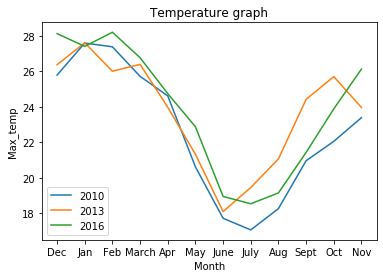

In [166]:
# Temperature analysis for Sydney

cols = Avg_temp.columns.tolist()
cols.insert(0, cols.pop(cols.index('Dec')))
Avg_temp = Avg_temp.reindex(columns= cols)
# print(cols)

x = cols
for i in range(10,17,3):
    
    plt.plot(x, Avg_temp.loc['20'+str(i),:], label = '20'+str(i)) 

    # naming the x axis 
    plt.xlabel('Month') 
    # naming the y axis 
    plt.ylabel('Max_temp') 

    # giving a title to my graph 
    plt.title('Temperature graph') 

# function to show the plot 
plt.legend()
plt.show() 

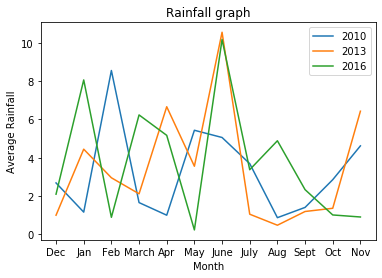

In [167]:
# Rainfall analysis for Sydney

# print(Rains)
cols = Rains.columns.tolist()
cols.insert(0, cols.pop(cols.index('Dec')))
Rains = Rains.reindex(columns= cols)
# print(cols)

x = cols
for i in range(10,17,3):
    
    plt.plot(x, Rains.loc['20'+str(i),:], label = '20'+str(i)) 

    # naming the x axis 
    plt.xlabel('Month') 
    # naming the y axis 
    plt.ylabel('Average Rainfall') 

    # giving a title to my graph 
    plt.title('Rainfall graph') 

# function to show the plot 
plt.legend()
plt.show() 